<a href="https://colab.research.google.com/github/MinahilSadiq1/Corn-Irrigation-detection/blob/main/Corn_Irrigation_Event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your dataset CSV file on Google Drive
dataset_path = '/content/drive/MyDrive/alpha-irrigation-data1.xlsx'

# The user has uploaded an Excel file with the dataset. Let's load the data from this Excel file.
# excel_file_path = '/content/alpha-irrigation-data1.xlsx'

# Load the data into a DataFrame
df = pd.read_excel(dataset_path)

# Display the first few rows to confirm it's loaded correctly
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CPR,PD,RVI,VH,VV,CPR1,PD1,RVI1,VH1,VV1,CPR2,PD2,RVI2,VH2,VV2,Difference
0,1.792327,10.146761,2.567503,-22.953040,-12.806279,1.699147,8.987719,2.518050,-21.842979,-12.855260,2.858451,15.162974,2.963315,-23.321903,-8.158929,1
1,1.699147,8.987719,2.518050,-21.842979,-12.855260,2.858451,15.162974,2.963315,-23.321903,-8.158929,1.911182,11.422129,2.625987,-23.957643,-12.535514,5
2,2.858451,15.162974,2.963315,-23.321903,-8.158929,1.911182,11.422129,2.625987,-23.957643,-12.535514,2.863937,15.355665,2.964787,-23.593960,-8.238294,0
3,1.911182,11.422129,2.625987,-23.957643,-12.535514,2.863937,15.355665,2.964787,-23.593960,-8.238294,2.138625,12.659169,2.725556,-23.777116,-11.117948,4
4,2.863937,15.355665,2.964787,-23.593960,-8.238294,2.138625,12.659169,2.725556,-23.777116,-11.117948,2.474425,13.223388,2.848730,-22.191891,-8.968504,7


In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the features (X) and the target (y)
X = df.drop('Difference', axis=1)
y = df['Difference']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with 100 trees
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Predict the 'Difference' for the test set
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model's performance
mse1 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 15.68323181818182


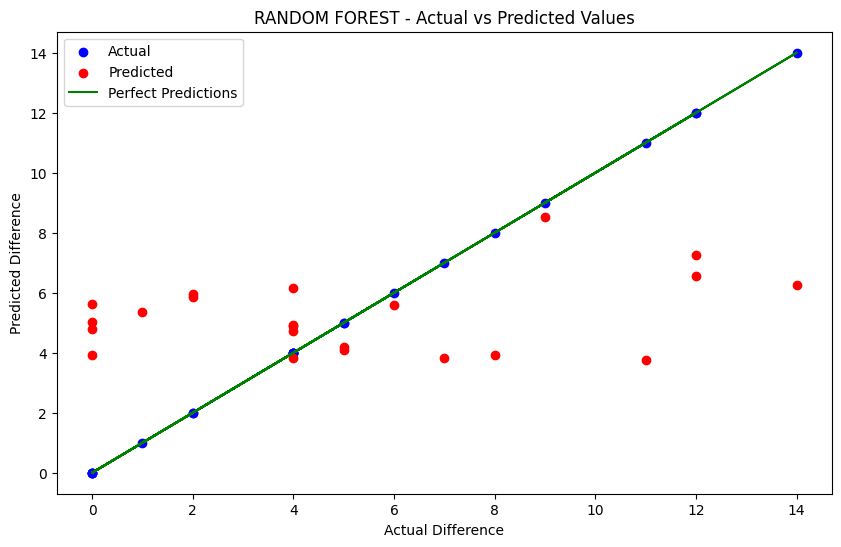

In [ ]:
# RANDOM FOREST

# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

# Output the Mean Absolute Error and R-squared Score
mae, r2

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Actual values - in blue
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Predicted values - in red
plt.scatter(y_test, y_pred, color='red', label='Predicted')

# Perfect predictions - in green
plt.plot(y_test, y_test, color='green', label='Perfect Predictions')

# Plot settings
plt.title('RANDOM FOREST - Actual vs Predicted Values')
plt.xlabel('Actual Difference')
plt.ylabel('Predicted Difference')
plt.legend()

plt.show()


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y_train)

# Predict the 'Difference' for the test set
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model's performance
mse2 = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error: {mse2}")

Mean Squared Error: 22.836164079061646


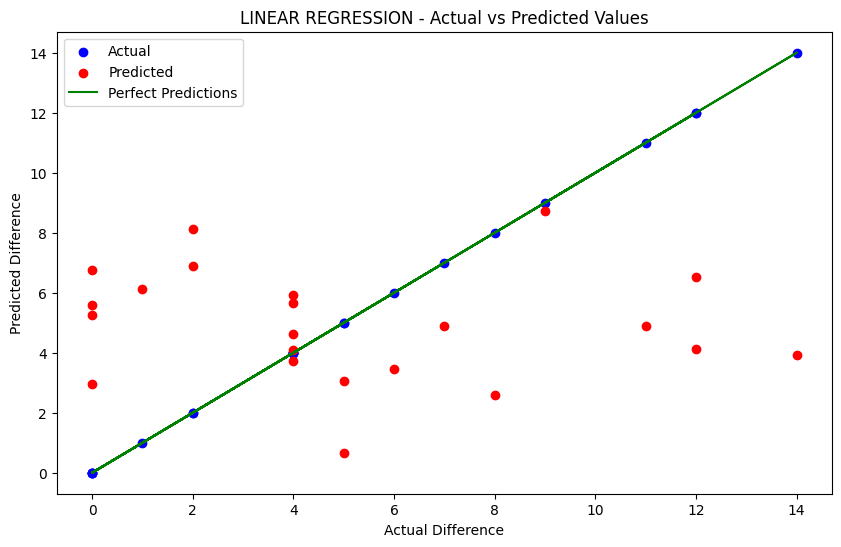

In [ ]:
#LINEAR REGRESSION

# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_pred_linear)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_linear)  # R-squared Score

# Output the Mean Absolute Error and R-squared Score
mae, r2

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Actual values - in blue
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Predicted values - in red
plt.scatter(y_test, y_pred_linear, color='red', label='Predicted')

# Perfect predictions - in green
plt.plot(y_test, y_test, color='green', label='Perfect Predictions')

# Plot settings
plt.title('LINEAR REGRESSION - Actual vs Predicted Values')
plt.xlabel('Actual Difference')
plt.ylabel('Predicted Difference')
plt.legend()

plt.show()


**SVR**

In [ ]:
from sklearn.svm import SVR

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_predict = svr.predict(X_test_scaled)

# Evaluate the model's performance
mse3 = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse3}")


Mean Squared Error: 18.55559008241361


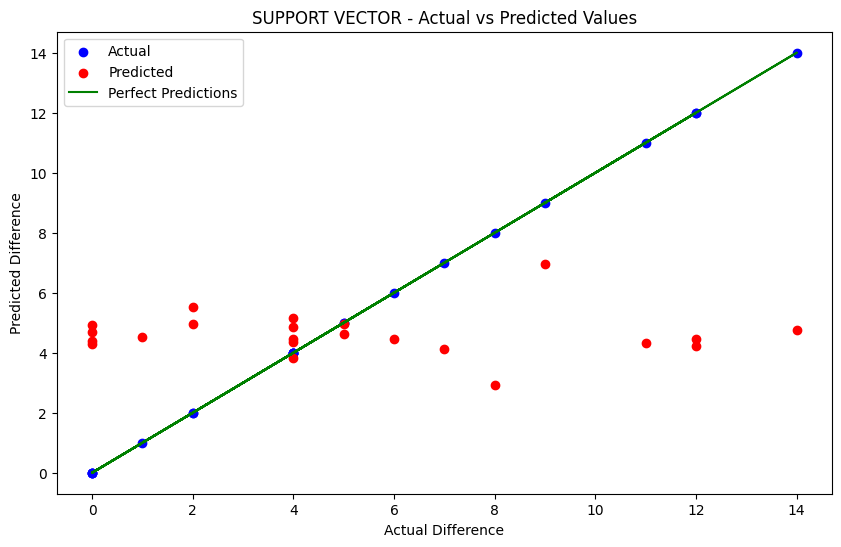

In [ ]:
#SUPPORT VECTOR REGRESSION

# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_predict)  # Mean Absolute Error
r2 = r2_score(y_test, y_predict)  # R-squared Score

# Output the Mean Absolute Error and R-squared Score
mae, r2

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Actual values - in blue
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Predicted values - in red
plt.scatter(y_test, y_predict, color='red', label='Predicted')

# Perfect predictions - in green
plt.plot(y_test, y_test, color='green', label='Perfect Predictions')

# Plot settings
plt.title('SUPPORT VECTOR - Actual vs Predicted Values')
plt.xlabel('Actual Difference')
plt.ylabel('Predicted Difference')
plt.legend()

plt.show()


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN regressor with a specified value of k
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# No actual training step for KNN, just fitting to the training data
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_predicted = knn_regressor.predict(X_test_scaled)

# Evaluate the model's performance
mse4 = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error: {mse4}")

Mean Squared Error: 14.589090909090906


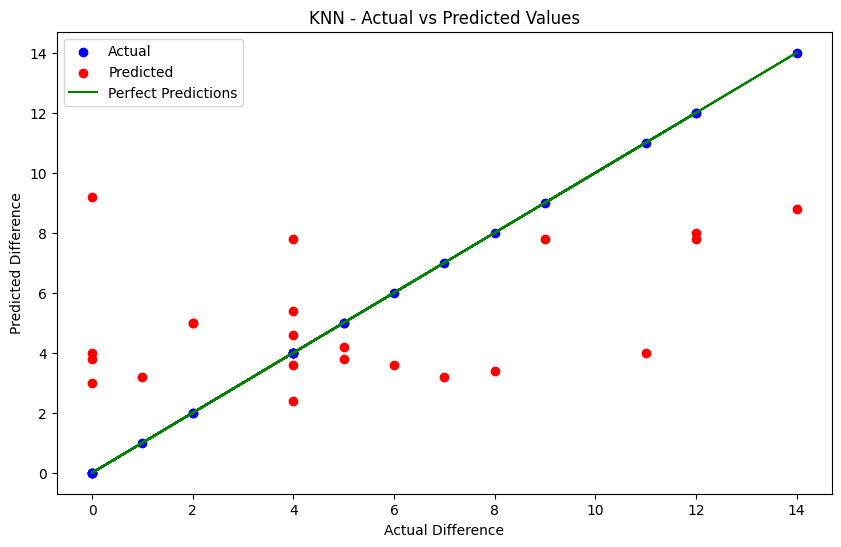

In [ ]:
#KNN

# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_predicted)  # Mean Absolute Error
r2 = r2_score(y_test, y_predicted)  # R-squared Score

# Output the Mean Absolute Error and R-squared Score
mae, r2

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Actual values - in blue
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Predicted values - in red
plt.scatter(y_test, y_predicted, color='red', label='Predicted')

# Perfect predictions - in green
plt.plot(y_test, y_test, color='green', label='Perfect Predictions')

# Plot settings
plt.title('KNN - Actual vs Predicted Values')
plt.xlabel('Actual Difference')
plt.ylabel('Predicted Difference')
plt.legend()

plt.show()


**Decision Tress Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor with hyperparameters
regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2)

regressor.fit(X_train, y_train)

y_pred_dt = regressor.predict(X_test)

# Evaluate the model's performance (e.g., using mean squared error for regression)
mse5 = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse5}")

Mean Squared Error: 22.226767419088848


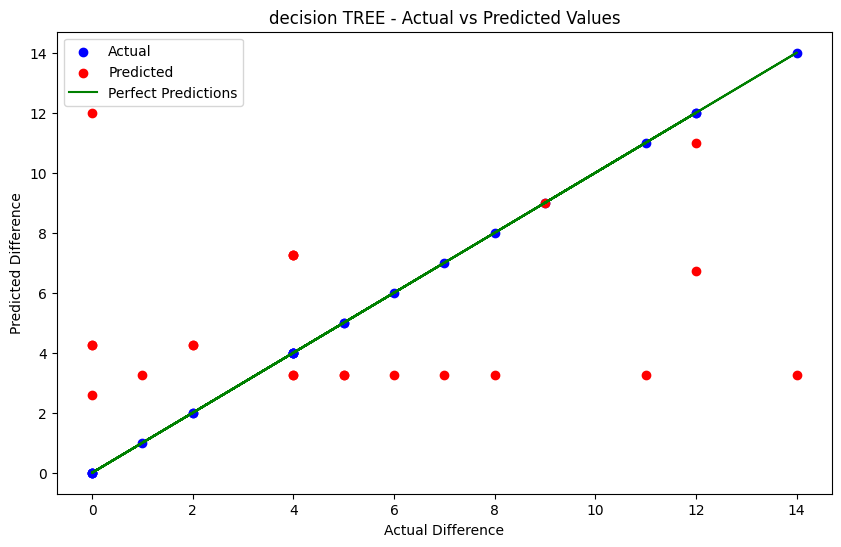

In [ ]:
# Decision Tree

# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_pred_dt)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_dt)  # R-squared Score

# Output the Mean Absolute Error and R-squared Score
mae, r2

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Actual values - in blue
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Predicted values - in red
plt.scatter(y_test, y_pred_dt, color='red', label='Predicted')

# Perfect predictions - in green
plt.plot(y_test, y_test, color='green', label='Perfect Predictions')

# Plot settings
plt.title('decision TREE - Actual vs Predicted Values')
plt.xlabel('Actual Difference')
plt.ylabel('Predicted Difference')
plt.legend()

plt.show()

In [ ]:

model_names = ["Random Forest", "Linear Regression", "SVR", "KNN", "Decision Tree"]
mse_values = [mse1, mse2, mse3, mse4, mse5]

# Create a DataFrame
df = pd.DataFrame({'Model Name': model_names, 'MSE': mse_values})

# Display the DataFrame as a table
print(df)


          Model Name        MSE
0      Random Forest  15.683232
1  Linear Regression  22.836164
2                SVR  18.555590
3                KNN  14.589091
4      Decision Tree  22.226767


In [ ]:
# Assuming you have a new instance with the following values for each feature
new_instance = {
    'CPR': 2.8584513806122,
    'PD': 15.1629737129879,
    'RVI': 2.96331465517511,
    'VH': -23.321903169616,
    'VV': -8.15892945662804,
    'CPR1': 1.91118153826753,
    'PD1': 11.42212909455,
    'RVI1': 2.62598743931976,
    'VH1': -23.9576432756948,
    'VV1': -12.5355141811448,
    'CPR2': 2.86393742775205,
    'PD2': 15.355665393996,
    'RVI2': 2.96478654874928,
    'VH2': -23.5939598589101,
    'VV2': -8.23829446491414



}

# Convert the dictionary to a DataFrame
new_instance_df = pd.DataFrame([new_instance])

# Predict the 'Difference' using the trained model
predicted_difference = random_forest_regressor.predict(new_instance_df)

# Output the prediction
predicted_difference


array([1.69])